<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

# 1 Some nomenclature

- figures
- axes
- x and y axes
- twinx()

# 2 Comparing the two ‘dialects’

In [4]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

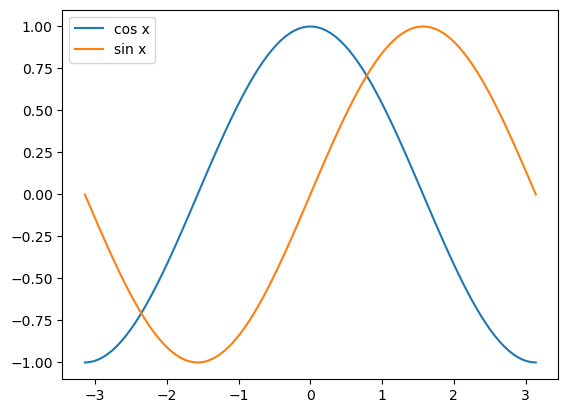

In [5]:
plt.plot(x, cos_x, label="cos x")
plt.plot(x, sin_x, label="sin x")
plt.legend()

### OO Interface

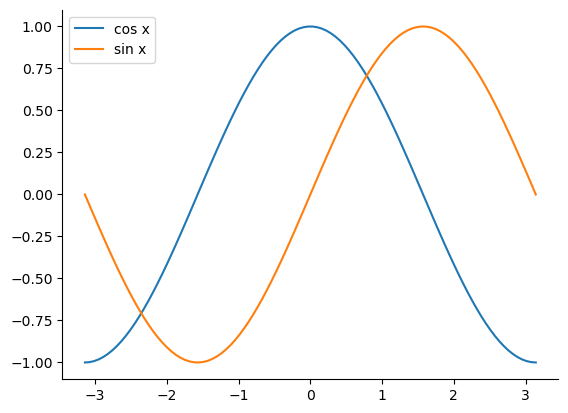

In [12]:
fig, ax = plt.subplots()
ax.plot(x, cos_x, label="cos x")
ax.plot(x, sin_x, label="sin x")
ax.legend()
ax.spines[["top", "right"]].set_visible(False)

# 3 What is OO ax, really?

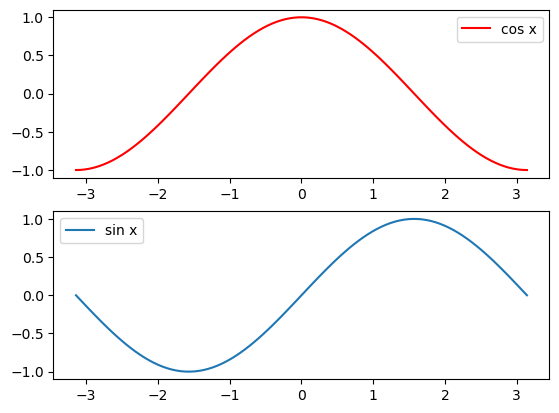

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label="cos x", c="r")
ax[1].plot(x, sin_x, label="sin x")

ax[0].legend()
ax[1].legend()

In [98]:
type(ax)

numpy.ndarray

In [100]:
ax[0]

array([<Axes: >, <Axes: >], dtype=object)

In [101]:
type(ax[1])

numpy.ndarray

In [18]:
ax.shape

(2,)

# 4 A complete OO example

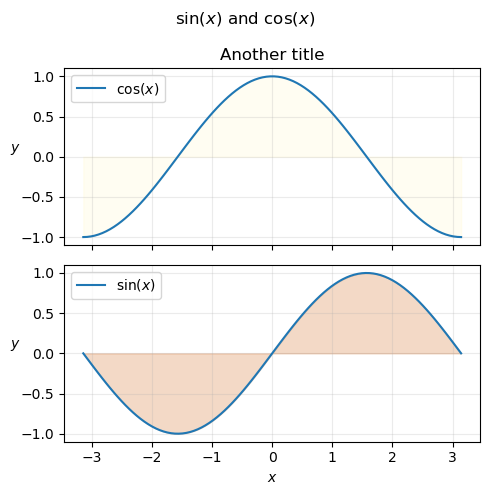

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)

ax[0].plot(x, cos_x, label=r"$\cos(x)$")
ax[0].fill_between(x, 0, cos_x, alpha=.25, color="lemonchiffon")

ax[1].plot(x, sin_x, label=r"$\sin(x)$")
ax[1].fill_between(x, 0, sin_x, alpha=.25, color="chocolate")

for a in ax.flatten():
    a.grid(alpha=.25)
    a.legend(loc="upper left")
    a.set_ylabel("$y$", rotation=0)

ax[1].set_xlabel("$x$")
ax[0].set_title("Another title")
fig.suptitle(r"$\sin(x)$ and $\cos(x)$")
fig.tight_layout()

# 5 Multiple rows and columns

### Using ax

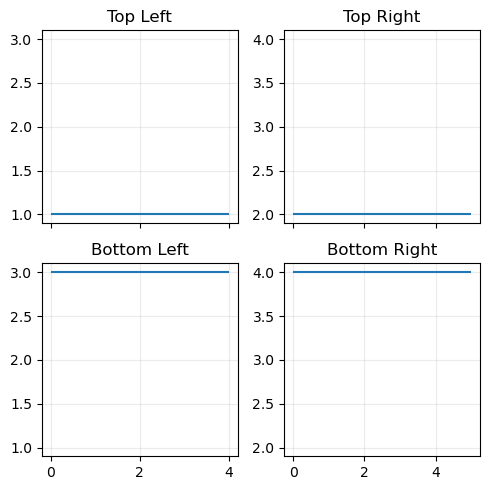

In [114]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex="col", sharey="col")  # y-axis is shared across a column

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# Titles
top_left.set_title("Top Left")
top_right.set_title("Top Right")
bottom_left.set_title("Bottom Left")
bottom_right.set_title("Bottom Right")

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

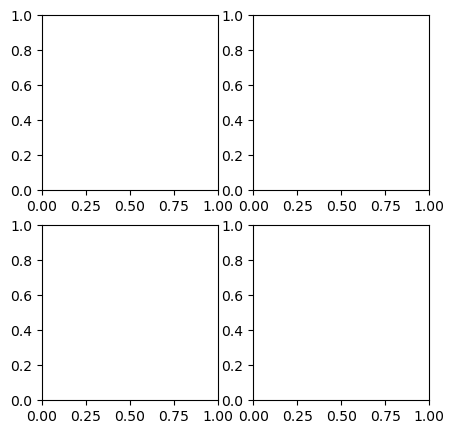

In [59]:
# No specifications on sharing
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

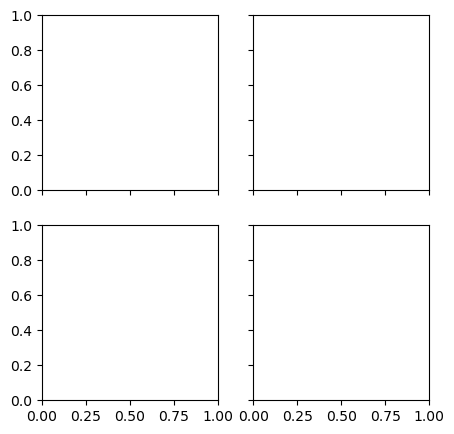

In [116]:
# All plots have the same range for the x-axis, and
# the y-axis is shared across the rows
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey="row"  
)

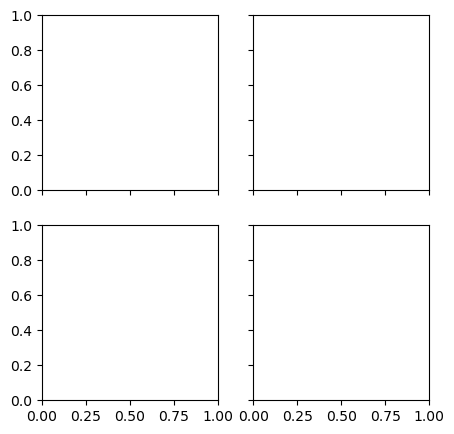

In [117]:
# The x-axis is shared across the columns while the y-axis is 
# shared across the rows
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex="col", sharey="row"
)

## 5.2 Accessing all axes

In [57]:
# Less efficient
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [58]:
# Better method
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

[sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)

[sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)

### A quick helper function

In [60]:
def get_plot_data():
    data = {}
    filename = "sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv"
    data["All"] = np.loadtxt(filename, skiprows=1)  # Skip the heading
    
    filename = "sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv"
    data["NUS"] = np.loadtxt(filename, skiprows=1)  # Skip the heading

    return data

### The histogram

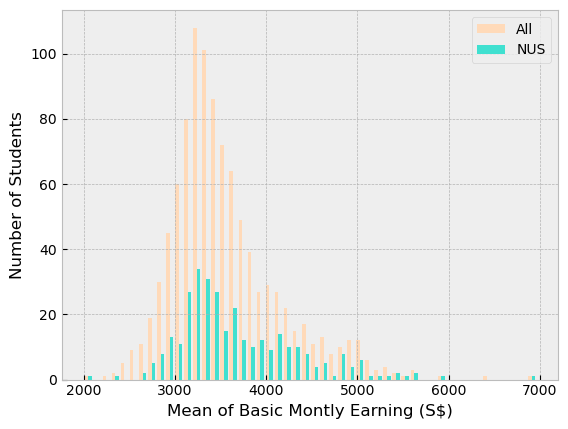

In [109]:
plt.style.use("bmh")
data = get_plot_data()

# bins - how many bins to split the data
plt.hist([data["All"], data["NUS"]], bins=50, label=["All", "NUS"], color=["peachpuff", "turquoise"])
plt.xlabel("Mean of Basic Montly Earning (S$)")
plt.ylabel("Number of Students")
plt.legend()

## 6.2 Scatter plots

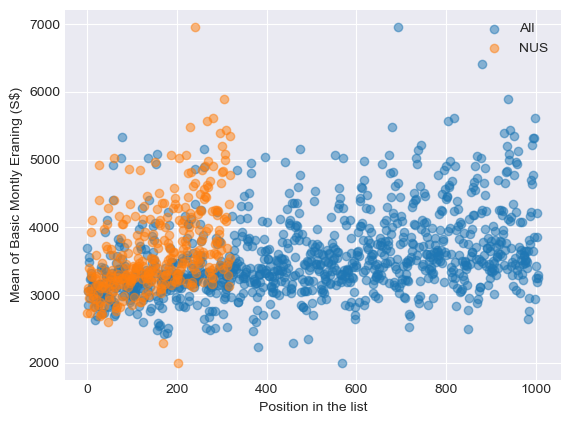

In [118]:
plt.style.use("seaborn-v0_8-darkgrid")
data = get_plot_data()
for lab, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=lab, alpha=.5)

plt.xlabel("Position in the list")
plt.ylabel("Mean of Basic Montly Eraning (S$)")
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

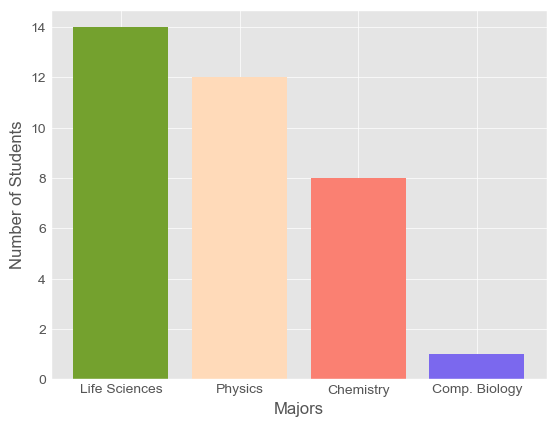

In [84]:
student_numbers = {"Life Sciences": 14,
                   "Physics": 12,
                   "Chemistry": 8,
                   "Comp. Biology": 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("ggplot")
plt.bar(majors, numbers, color=["#74A12E", "peachpuff", "salmon", "mediumslateblue"])
plt.xlabel("Majors")
plt.ylabel("Number of Students")

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

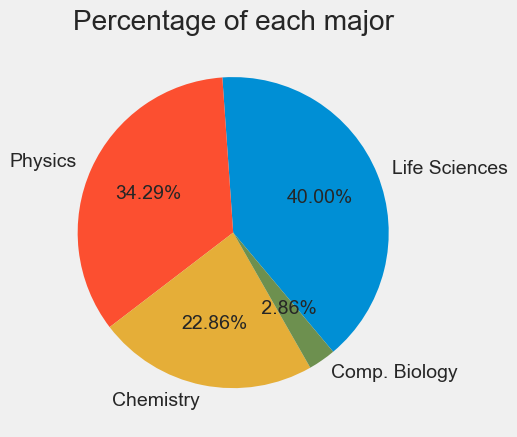

In [94]:
student_numbers = {"Life Sciences": 14,
                   "Physics": 12,
                   "Chemistry": 8,
                   "Comp. Biology": 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("fivethirtyeight")
plt.pie(numbers, 
        labels=majors,
        autopct="%5.2f%%",   # How to format the percentages
        startangle=-50,
        )
plt.title("Percentage of each major")